#### Author Name: Gabriela Shamblin
#### Dataset: Purchase Card (PCard) Fiscal Year 2014 [Link](https://catalog.data.gov/dataset/purchase-card-pcard-fiscal-year-2014)

In [ ]:
#Packages related to general operating system & warnings
import os 
import warnings
import statistics
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor 
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 600x300 with 0 Axes>

In [ ]:
data = pd.read_csv("data-purchases-fiscal-year.csv")
num_transaction = len(data)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


(442458, 11)

In [ ]:
data.drop_duplicates(inplace=True)
data.info()
# ~15,000 duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427410 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    427410 non-null  int64  
 1   Agency Number                 427410 non-null  int64  
 2   Agency Name                   427410 non-null  object 
 3   Cardholder Last Name          427410 non-null  object 
 4   Cardholder First Initial      427410 non-null  object 
 5   Description                   427410 non-null  object 
 6   Amount                        427410 non-null  float64
 7   Vendor                        427410 non-null  object 
 8   Transaction Date              427410 non-null  object 
 9   Posted Date                   427410 non-null  object 
 10  Merchant Category Code (MCC)  427410 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 39.1+ MB


# Preprocessing

In [ ]:
# Clean up dates (including year-month)
dataframe = pd.DataFrame(data, columns=['Year-Month', 'Agency Number', 'Agency Name', 
                                        'Cardholder Last Name', 'Cardholder First Initial',
                                        'Description', 'Amount', 'Vendor', 'Transaction Date',
                                        'Posted Date', 'Merchant Category Code (MCC)'])
dataframe.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,7/30/2013 0:00,7/31/2013 0:00,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,7/30/2013 0:00,7/31/2013 0:00,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,7/29/2013 0:00,7/31/2013 0:00,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,7/30/2013 0:00,7/31/2013 0:00,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,7/30/2013 0:00,7/31/2013 0:00,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [ ]:
new_data = data
new_data = data.drop(columns=['Year-Month', 'Agency Name', 'Cardholder Last Name', 'Cardholder First Initial', 'Description'])

In [ ]:
new_data['Transaction Date'] = new_data['Transaction Date'].replace('([0-2][0-9]:[0-5][0-9]:[0-5][0-9] [AP]M)|([0-2]:[0-5][0-9])', '', regex=True)
new_data['Transaction Date'] = new_data['Transaction Date'].replace('/', '', regex=True)
new_data['Transaction Date'] = new_data['Transaction Date'].astype('int64')

new_data['Posted Date'] = new_data['Posted Date'].replace('([0-2][0-9]:[0-5][0-9]:[0-5][0-9] [AP]M)|([0-2]:[0-5][0-9])', '', regex=True)
new_data['Posted Date'] = new_data['Posted Date'].replace('/', '', regex=True)
new_data['Posted Date'] = new_data['Posted Date'].astype('int64')

In [ ]:
new_data['Vendor'] = new_data['Vendor'].replace('#[0-9]*', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('[0-9]*', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('STAPLES [A-Z]*', 'STAPLES', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('STAPLS', 'STAPLES', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('^AMAZON.', 'Amazon.com', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('^STILLWATER.', 'STILLWATER', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('^TRAINING.', 'TRAINING', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('(=|,)*', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('INC', '', regex=True)

new_data['Vendor'] = new_data['Vendor'].replace('((\s)+)$', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('^((\s)+)', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('^([.=,-/]+)', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('([=,-/]+)$', '', regex=True)

new_data['Vendor'] = new_data['Vendor'].replace('^((\s)+)', '', regex=True)
new_data['Vendor'] = new_data['Vendor'].replace('((\s)+)$', '', regex=True)

new_data.head

<bound method NDFrame.head of         Agency Number    Amount                     Vendor  Transaction Date  \
0                1000    890.00                      NACAS           7302013   
1                1000    368.96             SHERATON HOTEL           7302013   
2                1000    165.82                  SEARS.COM           7292013   
3                1000     96.39                   WAL-MART           7302013   
4                1000    125.96                    STAPLES           7302013   
...               ...       ...                        ...               ...   
442453          98000    992.00        TOTAL VALVE SYSTEMS           6202014   
442454          98000   2415.00  PRYOR WASTE & RECYCLING L           6202014   
442455          98000    177.50  ACCURATE ENVIROMENTAL LAB           6202014   
442456          98000  32457.00            RED BUD SERVICE           6192014   
442457          98000   4714.07      WARRENCAT CREDIT DEPT           6202014   

        P

In [ ]:
new_data['Vendor'] = new_data['Vendor'].astype('category').cat.codes.values
new_data['Merchant Category Code (MCC)'] = new_data['Merchant Category Code (MCC)'].astype('category').cat.codes.values

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427410 entries, 0 to 442457
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Agency Number                 427410 non-null  int64  
 1   Amount                        427410 non-null  float64
 2   Vendor                        427410 non-null  int32  
 3   Transaction Date              427410 non-null  int64  
 4   Posted Date                   427410 non-null  int64  
 5   Merchant Category Code (MCC)  427410 non-null  int16  
dtypes: float64(1), int16(1), int32(1), int64(3)
memory usage: 18.8 MB


#Clustering

In [ ]:
km = KMeans(init='random', n_clusters=2, n_init='auto', random_state=None).fit(new_data)
centroids = km.cluster_centers_
km_pred = km.predict(new_data)
labels = pd.DataFrame(km.labels_)
# new_data['Cluster'] = km.labels_

print(centroids)

# plt.scatter(new_data['Agency Number'], new_data['Amount'], c=km.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()

[[4.26275652e+04 4.42294253e+02 1.88410930e+04 8.75658714e+06
  8.94240396e+06 2.00272598e+02]
 [4.27983508e+04 4.23622564e+02 1.86097111e+04 2.16866269e+06
  2.15741806e+06 2.00940016e+02]]


In [ ]:
clusters = pd.DataFrame(labels.value_counts())
# clusters = clusters.reset_index()
# clusters.columns = ['Cluster', 'Count']
# labels = clusters['Cluster']
print(clusters)

        0
0        
1  257152
0  170258


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centers):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centers_2d = pca.transform(centers)
  clear_output(wait=True)
  plt.title('Clusters')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centers_2d[:,0], y=centers_2d[:,1], c="#ff0000")
  # plt.axes().set_facecolor("#5c9dd6")
  plt.show()

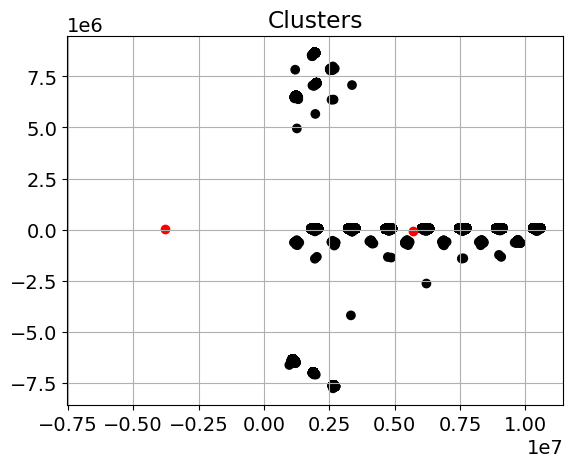

In [ ]:
plot_clusters(new_data.to_numpy(), km.labels_, centroids)

In [ ]:
new_data.to_csv('cleaned_test_data_clusters.csv')

## UMAP

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=32d47491dc3cf917975395b25c130824f720f2cba163ddcc8ec77cce25efb89d
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=522cda7e9ffbf419d71ebe8ae695cb3de7e56dd2b39ffecedd416b8ba27d3630
  Stored in directory: /root/.cache/pip/wheels/12/f9/4d/ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


In [ ]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(new_data)

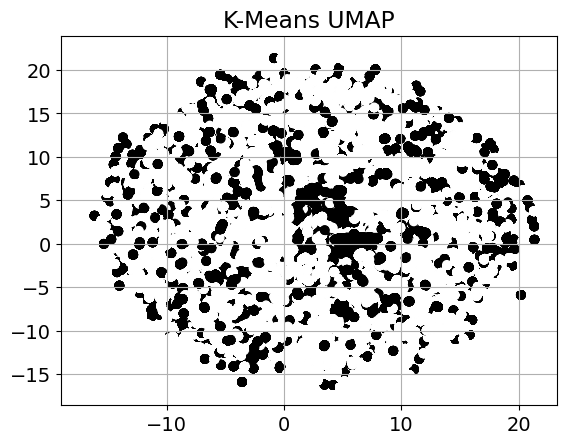

In [ ]:
plt.title('K-Means UMAP')
plt.scatter(x=embedding[:,0], y=embedding[:,1], c=labels)

## T-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(new_data)

In [ ]:
plt.title('K-Means t-SNE')
plt.scatter(x=tsne_results[:,0], y=tsne_results[:,1], c=labels)